In [ ]:
#Column names description#
'''
yearID         Year

lgID           League

teamID         Team

franchID       Franchise

divID          Team's division

Rank           Position in final standings

GHome          Games played at home

DivWin         Division Winner (Y or N)

WCWin          Wild Card Winner (Y or N)

LgWin          League Champion(Y or N)

WSWin          World Series Winner (Y or N)

name           Team's full name

park           Name of team's home ballpark

attendance     Home attendance total

BPF            Three-year park factor for batters

PPF            Three-year park factor for pitchers

teamIDBR       Team ID used by Baseball Reference website

teamIDlahman45 Team ID used in Lahman database version 4.5

teamIDretro    Team ID used by Retrosheet
'''

"\nyearID         Year\n\nlgID           League\n\nteamID         Team\n\nfranchID       Franchise\n\ndivID          Team's division\n\nRank           Position in final standings\n\nGHome          Games played at home\n\nDivWin         Division Winner (Y or N)\n\nWCWin          Wild Card Winner (Y or N)\n\nLgWin          League Champion(Y or N)\n\nWSWin          World Series Winner (Y or N)\n\nname           Team's full name\n\npark           Name of team's home ballpark\n\nattendance     Home attendance total\n\nBPF            Three-year park factor for batters\n\nPPF            Three-year park factor for pitchers\n\nteamIDBR       Team ID used by Baseball Reference website\n\nteamIDlahman45 Team ID used in Lahman database version 4.5\n\nteamIDretro    Team ID used by Retrosheet\n"

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)
#importing dataset
df1=pd.read_csv('/content/drive/MyDrive/Celebal Internship/Teams.csv')

In [ ]:
#copying the dataset
df=df1.copy()
#dispalying first 5 rows
df.head()

,yearID,lgID,teamID,franchID,divID,Rank,Ghome,DivWin,WCWin,LgWin,WSWin,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,NaN,NaN,NaN,N,NaN,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,NaN,NaN,NaN,N,NaN,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,NaN,NaN,NaN,N,NaN,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,NaN,NaN,NaN,N,NaN,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,NaN,NaN,NaN,N,NaN,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [ ]:
#no. of rows and columns
df.shape

(2955, 19)

In [ ]:
#checking missing values
df.isnull()

,yearID,lgID,teamID,franchID,divID,Rank,Ghome,DivWin,WCWin,LgWin,WSWin,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,False,True,False,False,True,False,True,True,True,False,True,False,False,True,False,False,False,False,False
1,False,True,False,False,True,False,True,True,True,False,True,False,False,True,False,False,False,False,False
2,False,True,False,False,True,False,True,True,True,False,True,False,False,True,False,False,False,False,False
3,False,True,False,False,True,False,True,True,True,False,True,False,False,True,False,False,False,False,False
4,False,True,False,False,True,False,True,True,True,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2951,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2952,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2953,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#checking datatype of columns
df.dtypes

yearID              int64
lgID               object
teamID             object
franchID           object
divID              object
Rank                int64
Ghome             float64
DivWin             object
WCWin              object
LgWin              object
WSWin              object
name               object
park               object
attendance        float64
BPF                 int64
PPF                 int64
teamIDBR           object
teamIDlahman45     object
teamIDretro        object
dtype: object

In [ ]:
#checking no. of missing values
df.isnull().sum()

yearID               0
lgID                50
teamID               0
franchID             0
divID             1517
Rank                 0
Ghome              399
DivWin            1545
WCWin             2181
LgWin               28
WSWin              357
name                 0
park                34
attendance         279
BPF                  0
PPF                  0
teamIDBR             0
teamIDlahman45       0
teamIDretro          0
dtype: int64

In [ ]:
#correcting values 
df['lgID'].fillna("NA",inplace=True)

In [ ]:
#dropping columns containg a lot many missing values
df.drop(columns=['divID','DivWin','WCWin','teamIDBR','teamIDlahman45','teamIDretro'],axis=1,inplace=True)

In [ ]:
#filling null values with mean
df['Ghome'].fillna(df['Ghome'].mean(),inplace=True)

In [ ]:
#dropping remaining missing values as there are less
df.dropna(axis=0,inplace=True)

In [ ]:
#checking count of null values
df.isnull().sum()

yearID        0
lgID          0
teamID        0
franchID      0
Rank          0
Ghome         0
LgWin         0
WSWin         0
name          0
park          0
attendance    0
BPF           0
PPF           0
dtype: int64

In [ ]:
#checking the shape after cleaning data
df.shape

(2488, 13)

In [ ]:
#showing first five rows of dataset
df.head()

,yearID,lgID,teamID,franchID,Rank,Ghome,LgWin,WSWin,name,park,attendance,BPF,PPF
240,1890,NL,BRO,LAD,1,78.014476,Y,N,Brooklyn Bridegrooms,Washington Park II,121412.0,101,97
242,1890,NL,BSN,ATL,5,78.014476,N,N,Boston Beaneaters,South End Grounds II,147539.0,108,105
244,1890,NL,CHN,CHC,2,78.014476,N,N,Chicago Colts,West Side Park I,102536.0,104,102
246,1890,NL,CIN,CIN,4,78.014476,N,N,Cincinnati Reds,League Park I in Cincinnati,131980.0,101,101
247,1890,NL,CL4,CLV,7,78.014476,N,N,Cleveland Spiders,National League Park,47478.0,94,97


In [ ]:
#showing first five rows of dataset after restting index
df.reset_index(drop=True,inplace=True)
df.head()

,yearID,lgID,teamID,franchID,Rank,Ghome,LgWin,WSWin,name,park,attendance,BPF,PPF
0,1890,NL,BRO,LAD,1,78.014476,Y,N,Brooklyn Bridegrooms,Washington Park II,121412.0,101,97
1,1890,NL,BSN,ATL,5,78.014476,N,N,Boston Beaneaters,South End Grounds II,147539.0,108,105
2,1890,NL,CHN,CHC,2,78.014476,N,N,Chicago Colts,West Side Park I,102536.0,104,102
3,1890,NL,CIN,CIN,4,78.014476,N,N,Cincinnati Reds,League Park I in Cincinnati,131980.0,101,101
4,1890,NL,CL4,CLV,7,78.014476,N,N,Cleveland Spiders,National League Park,47478.0,94,97


In [ ]:
#description of few columns
df.describe()

,yearID,Rank,Ghome,attendance,BPF,PPF
count,2488.000000,2488.000000,2488.000000,2.488000e+03,2488.000000,2488.000000
mean,1970.030547,3.866559,78.358166,1.444274e+06,100.194132,100.185289
std,33.986170,2.116975,6.610231,9.530529e+05,4.588461,4.636683
min,1890.000000,1.000000,24.000000,0.000000e+00,88.000000,88.000000
25%,1942.000000,2.000000,77.000000,6.331785e+05,97.000000,97.000000
50%,1975.000000,4.000000,81.000000,1.267530e+06,100.000000,100.000000
75%,2000.000000,5.000000,81.000000,2.133504e+06,103.000000,103.000000
max,2020.000000,10.000000,84.000000,4.483350e+06,129.000000,129.000000


In [ ]:
#correlation among the columns
df.corr()

,yearID,Rank,Ghome,attendance,BPF,PPF
yearID,1.000000,-0.275776,0.116512,0.746659,-0.003289,-0.001370
Rank,-0.275776,1.000000,-0.039222,-0.452923,-0.097962,0.155479
Ghome,0.116512,-0.039222,1.000000,0.375241,0.004374,-0.002955
attendance,0.746659,-0.452923,0.375241,1.000000,0.051104,-0.029756
BPF,-0.003289,-0.097962,0.004374,0.051104,1.000000,0.932944
PPF,-0.001370,0.155479,-0.002955,-0.029756,0.932944,1.000000


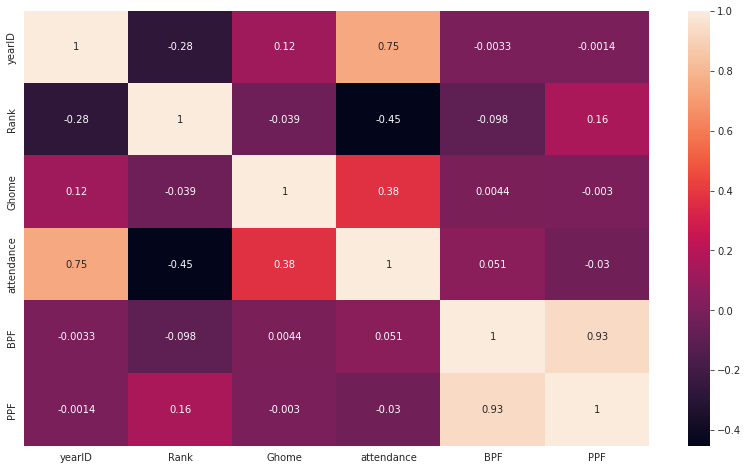

In [ ]:
#correlation visualization
sns.heatmap(df.corr(),annot=True)

In [ ]:
#teams when rank is 1
df.loc[df['Rank']==1]['name'].value_counts()

New York Yankees                 47
St. Louis Cardinals              27
Los Angeles Dodgers              22
Atlanta Braves                   20
Chicago Cubs                     18
Oakland Athletics                17
Boston Red Sox                   16
Detroit Tigers                   15
Cincinnati Reds                  15
New York Giants                  14
Pittsburgh Pirates               14
Cleveland Indians                13
Minnesota Twins                  13
Philadelphia Phillies            13
Baltimore Orioles                10
San Francisco Giants              9
Houston Astros                    9
Chicago White Sox                 9
Philadelphia Athletics            8
Kansas City Royals                7
Texas Rangers                     7
Brooklyn Dodgers                  7
Toronto Blue Jays                 6
New York Mets                     6
San Diego Padres                  5
Arizona Diamondbacks              5
Los Angeles Angels of Anaheim     5
Milwaukee Brewers           

In [ ]:
#Years when rank are 1
df.loc[df['Rank']==1]['yearID'].value_counts()
#yearID	lgID	teamID	franchID	Rank	Ghome park	attendance	BPF	PPF

2020    6
2006    6
2019    6
1995    6
1996    6
       ..
1941    2
1940    2
1939    2
1938    2
1890    1
Name: yearID, Length: 117, dtype: int64

In [ ]:
#leagues when ranks are 1
df.loc[df['Rank']==1]['lgID'].value_counts()

NL    194
AL    193
Name: lgID, dtype: int64

In [ ]:
#franchises when ranks are 1
df.loc[df['Rank']==1]['franchID'].value_counts()

NYY    47
LAD    32
STL    27
OAK    25
ATL    24
SFG    23
CHC    18
BOS    17
MIN    16
CIN    15
DET    15
PIT    14
CLE    13
PHI    13
BAL    11
HOU     9
CHW     9
ANA     9
TEX     7
KCR     7
TOR     6
NYM     6
SDP     5
ARI     5
MIL     4
WSN     4
SEA     3
TBD     3
Name: franchID, dtype: int64

In [ ]:
#no. of games played at home when ranks are 1
df.loc[df['Rank']==1]['Ghome'].value_counts()

81.000000    216
77.000000     37
78.000000     33
80.000000     22
79.000000     18
76.000000     15
82.000000     14
70.000000      5
72.000000      5
75.000000      5
74.000000      3
30.000000      2
84.000000      2
78.014476      1
54.000000      1
29.000000      1
56.000000      1
53.000000      1
73.000000      1
33.000000      1
31.000000      1
32.000000      1
49.000000      1
Name: Ghome, dtype: int64

In [ ]:
#teams' home ballparks when ranks are 1
df.loc[df['Rank']==1]['park'].value_counts()

Yankee Stadium I                    27
Dodger Stadium                      21
Yankee Stadium II                   14
Wrigley Field                       14
Polo Grounds IV                     14
                                    ..
Qualcomm Stadium                     1
Safeco Field                         1
Crosley Field/Riverfront Stadium     1
McAfee Coliseum                      1
3Com Park                            1
Name: park, Length: 92, dtype: int64

In [ ]:
#Batting park factor(runs increased if crosses 100) when ranks are 1
df.loc[df['Rank']==1]['BPF'].value_counts()

99     41
101    40
98     36
100    33
102    33
104    29
103    29
97     27
105    25
96     19
106    13
95     13
107    11
94      9
108     7
92      5
93      5
109     4
91      3
110     2
117     1
111     1
88      1
Name: BPF, dtype: int64

In [ ]:
#Pitching park factor(runs increased if crosses 100) when ranks are 1
df.loc[df['Rank']==1]['PPF'].value_counts()

100    44
98     43
95     36
97     35
102    33
99     28
101    27
103    23
96     19
105    15
94     15
93     15
104    13
92      8
107     7
106     6
91      6
108     4
90      3
109     3
89      1
115     1
111     1
88      1
Name: PPF, dtype: int64

Text(0.5, 1.0, 'No. of teams played games at homes')

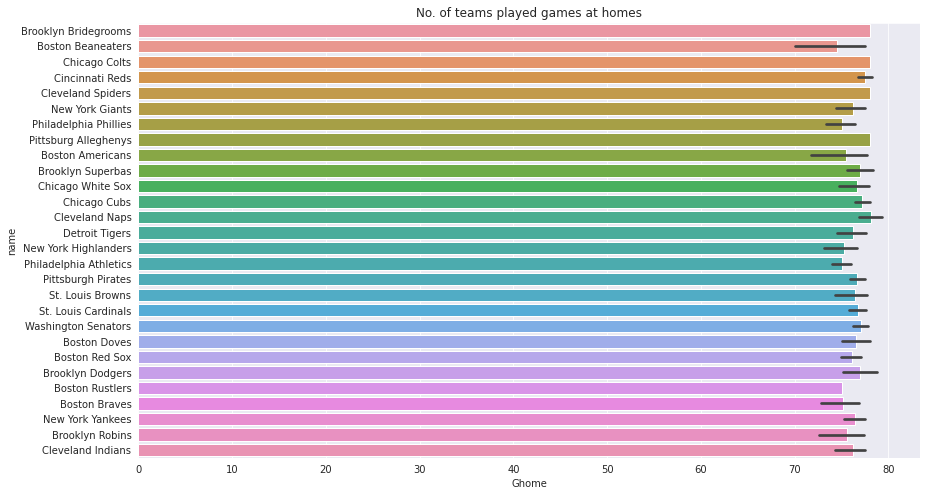

In [ ]:
#how many games played at home by teams
sns.barplot(x='Ghome',y='name',data=df[:500])
plt.title('No. of teams played games at homes')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'no. of matches played in years')

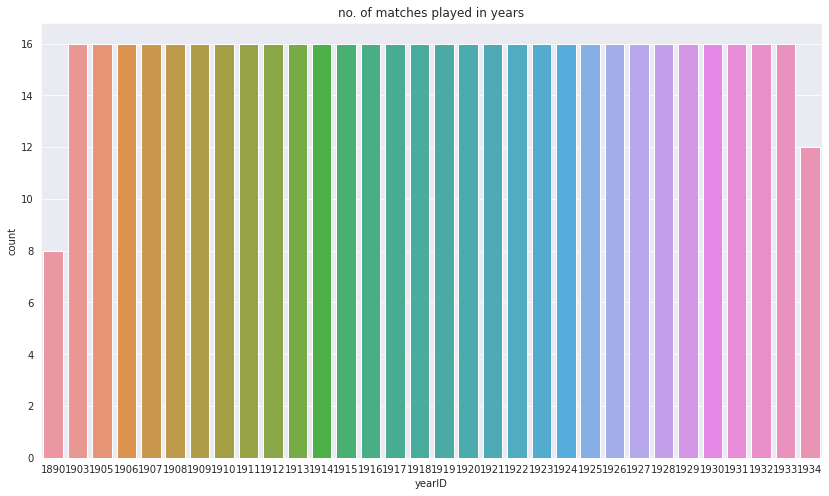

In [ ]:
#in which years many matches played
sns.countplot('yearID',data=df[:500])
plt.title('no. of matches played in years')

In [ ]:
#checking if duplicate values are present
df.duplicated().sum()
#if present, can remove by using df.drop_duplicates(inplace=True)

0

<function matplotlib.pyplot.show>

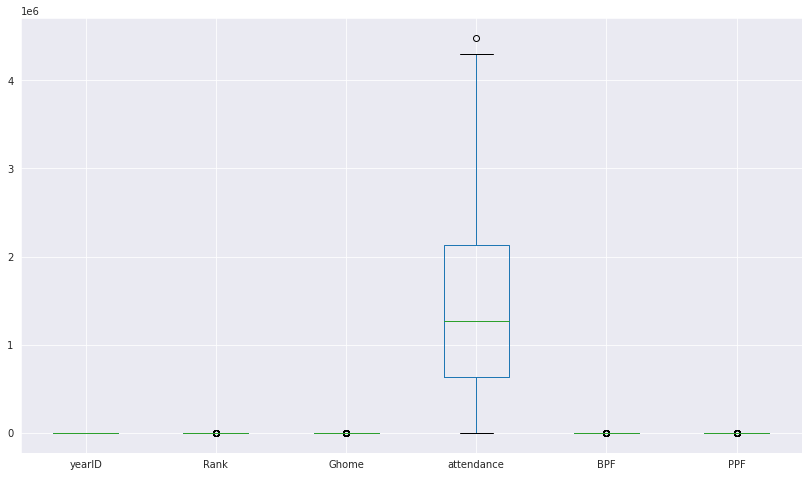

In [ ]:
df.boxplot()
plt.show

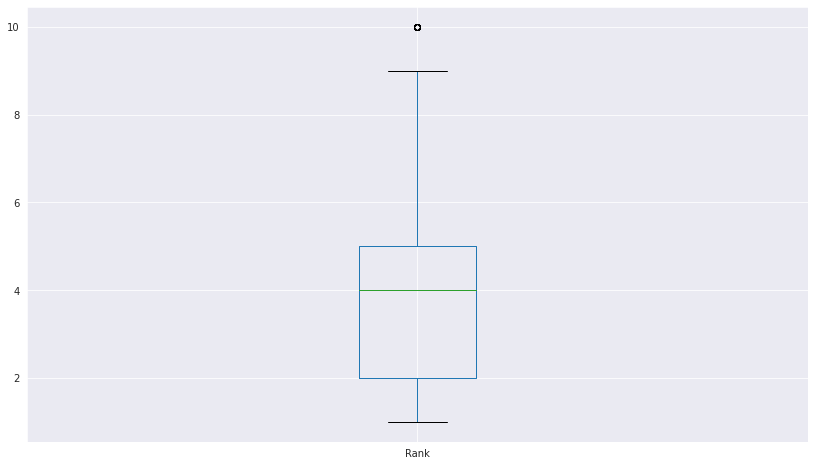

In [ ]:
df.boxplot(column='Rank') 

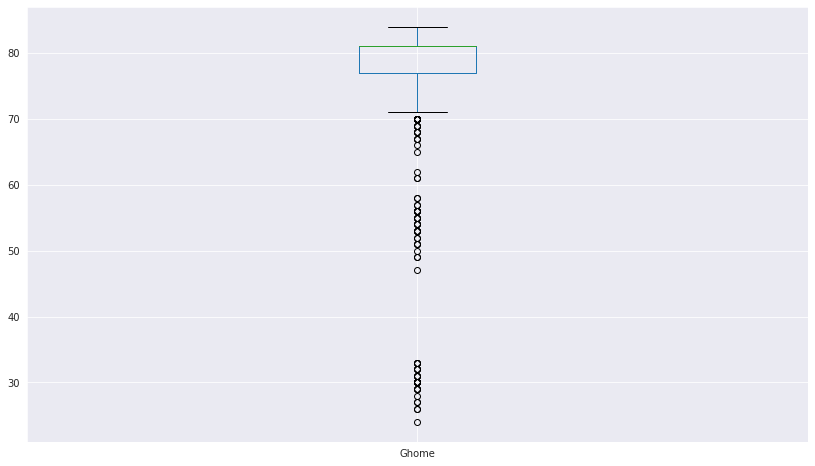

In [ ]:
df.boxplot(column='Ghome')

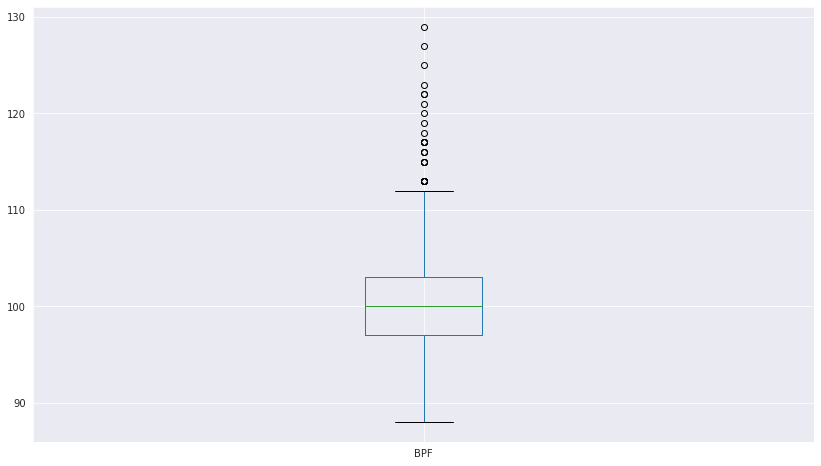

In [ ]:
df.boxplot(column='BPF')

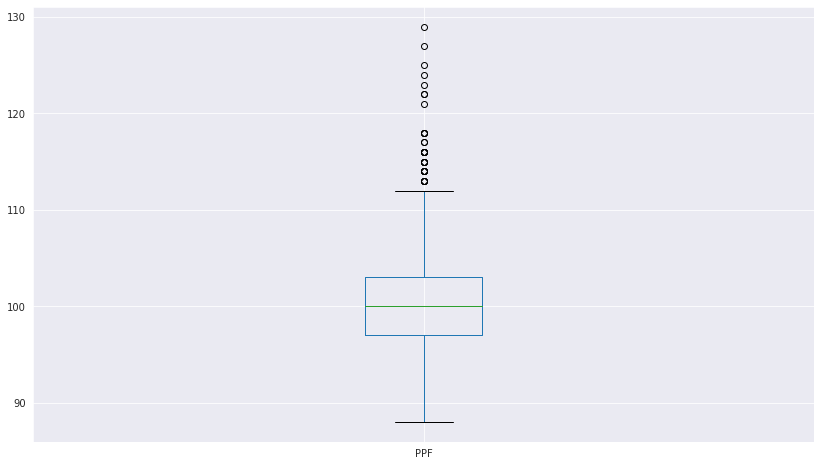

In [ ]:
df.boxplot(column='PPF')

In [ ]:
'''def removeoutlier(col):
  for i in range (len(col)):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lowerrange=Q1-(1.5*IQR)
    upperrange=Q3+(1.5*IQR)
  return lowerrange,upperrange

lowscore,highscore=removeoutlier(df['attendance'])'''

"def removeoutlier(col):\n  for i in range (len(col)):\n    sorted(col)\n    Q1,Q3=col.quantile([0.25,0.75])\n    IQR=Q3-Q1\n    lowerrange=Q1-(1.5*IQR)\n    upperrange=Q3+(1.5*IQR)\n  return lowerrange,upperrange\n\nlowscore,highscore=removeoutlier(df['attendance'])"

In [ ]:
#removing outliers where only one outlier is present
col_list=[]
lowerrange=[]
upperrange=[]
def removeoutlier(col_list):
  for i in range (len(col_list)):
    sorted(col_list[i])
    Q1,Q3=col_list[i].quantile([0.25,0.75])
    IQR=Q3-Q1
    lowerrange.append(Q1-(1.5*IQR))
    upperrange.append(Q3+(1.5*IQR))
  return lowerrange,upperrange

In [ ]:
lowscore=[]
highscore=[]
lowscore,highscore=removeoutlier([df['attendance'],df['Rank']])

In [ ]:
lowscore

[-1617309.75, -2.5]

In [ ]:
highscore

[4383992.25, 9.5]

In [ ]:
print(lowscore[0])
print(lowscore[1])
print(highscore[0])
highscore[1]

-1617309.75
-2.5
4383992.25


9.5

In [ ]:
#if it's greater than highscore, take it as high score...similary for low score
df['attendance']=np.where(df['attendance']>highscore[0],highscore[0],df['attendance'])
df['attendance']=np.where(df['attendance']<lowscore[0],lowscore[0],df['attendance'])

In [ ]:
df['Rank']=np.where(df['Rank']>highscore[1],highscore[1],df['Rank'])
df['Rank']=np.where(df['Rank']<lowscore[1],lowscore[1],df['Rank'])

<function matplotlib.pyplot.show>

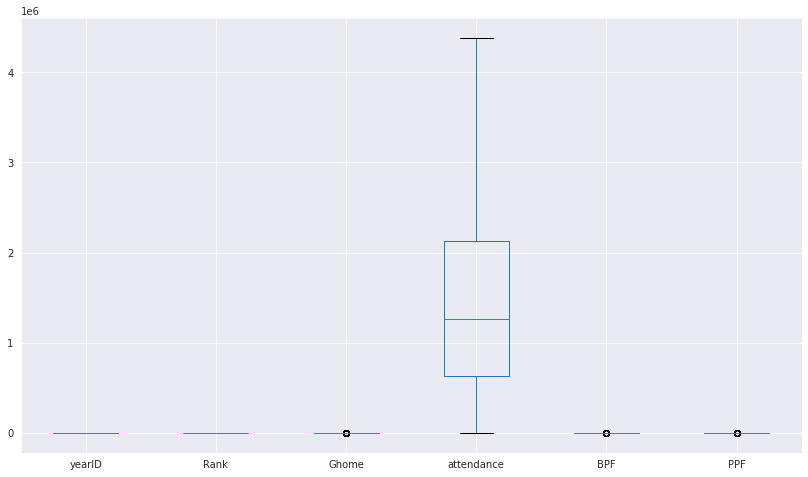

In [ ]:
#now checking if outliers removed
df.boxplot()
plt.show

In [ ]:
df.shape

(2488, 13)

In [ ]:
#standard scaling..for example we are taking attendance
'''from sklearn.preprocessing import StandardScaler
df['attendance']=StandardScaler().fit_transform(df[['attendance']])'''

"from sklearn.preprocessing import StandardScaler\ndf['attendance']=StandardScaler().fit_transform(df[['attendance']])"

In [ ]:
df.head()

,yearID,lgID,teamID,franchID,Rank,Ghome,LgWin,WSWin,name,park,attendance,BPF,PPF
0,1890,NL,BRO,LAD,1.0,78.014476,Y,N,Brooklyn Bridegrooms,Washington Park II,121412.0,101,97
1,1890,NL,BSN,ATL,5.0,78.014476,N,N,Boston Beaneaters,South End Grounds II,147539.0,108,105
2,1890,NL,CHN,CHC,2.0,78.014476,N,N,Chicago Colts,West Side Park I,102536.0,104,102
3,1890,NL,CIN,CIN,4.0,78.014476,N,N,Cincinnati Reds,League Park I in Cincinnati,131980.0,101,101
4,1890,NL,CL4,CLV,7.0,78.014476,N,N,Cleveland Spiders,National League Park,47478.0,94,97


In [ ]:
#sns.displot(df)

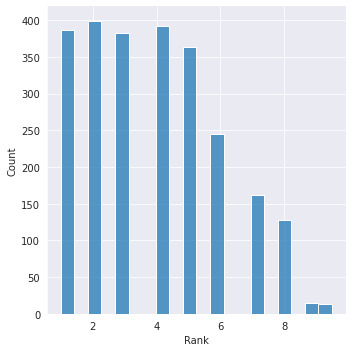

In [ ]:
sns.displot(df['Rank'])

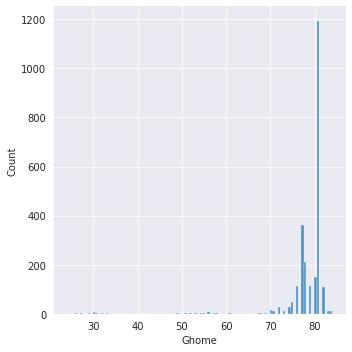

In [ ]:
sns.displot(df['Ghome'])

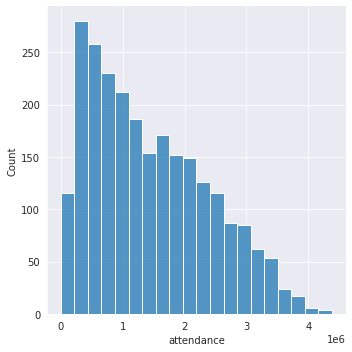

In [ ]:
sns.displot(df['attendance'])

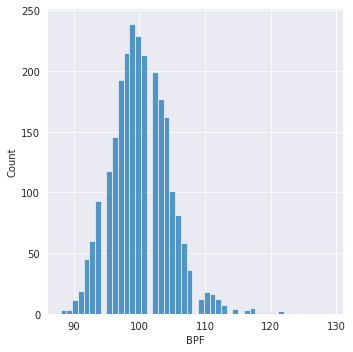

In [ ]:
sns.displot(df['BPF'])

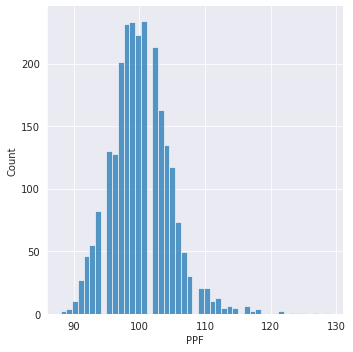

In [ ]:
sns.displot(df['PPF'])

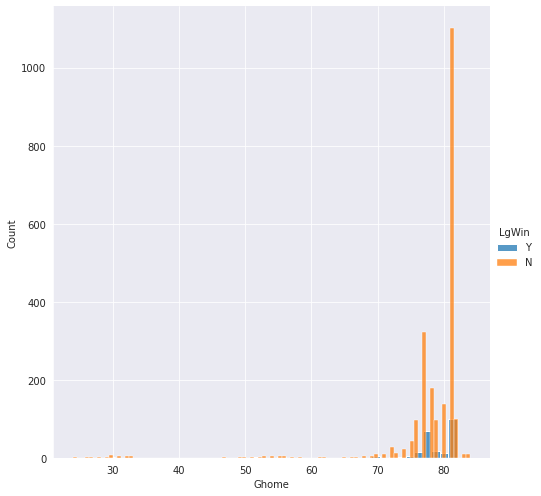

In [ ]:
sns.FacetGrid(df,hue="LgWin",height=7).map(sns.histplot,"Ghome").add_legend()

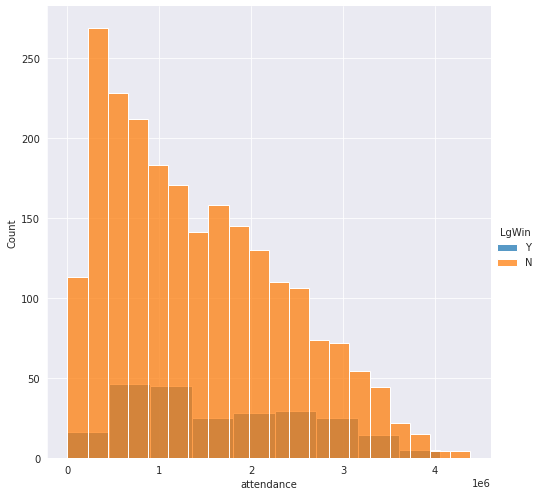

In [ ]:
sns.FacetGrid(df,hue="LgWin",height=7).map(sns.histplot,"attendance").add_legend()

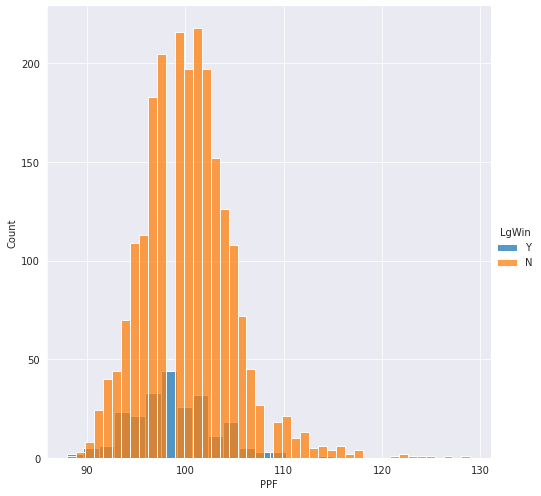

In [ ]:
sns.FacetGrid(df,hue="LgWin",height=7).map(sns.histplot,"PPF").add_legend()

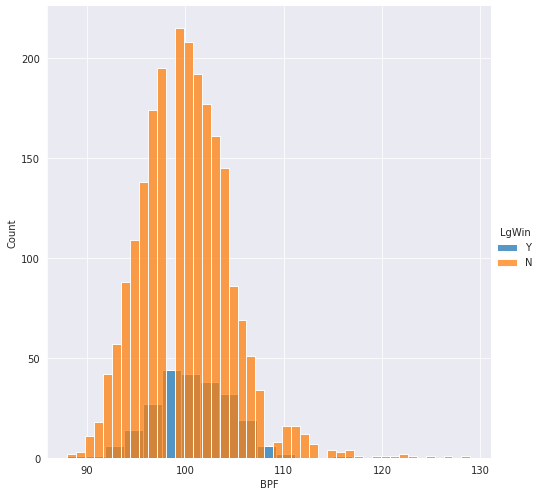

In [ ]:
sns.FacetGrid(df,hue="LgWin",height=7).map(sns.histplot,"BPF").add_legend()

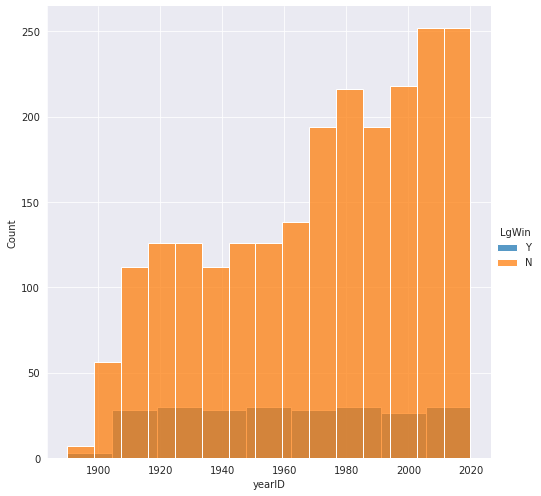

In [ ]:
sns.FacetGrid(df,hue="LgWin",height=7).map(sns.histplot,"yearID").add_legend()

probability density function(pdf [4.01929260e-03 8.03858521e-03 0.00000000e+00 4.01929260e-04
 5.22508039e-03 7.23472669e-03 1.60771704e-03 1.44694534e-02
 2.35932476e-01 7.23070740e-01]
bin_edges [24. 30. 36. 42. 48. 54. 60. 66. 72. 78. 84.]
cumulative distributive function(cdf) [0.00401929 0.01205788 0.01205788 0.01245981 0.01768489 0.02491961
 0.02652733 0.04099678 0.27692926 1.        ]


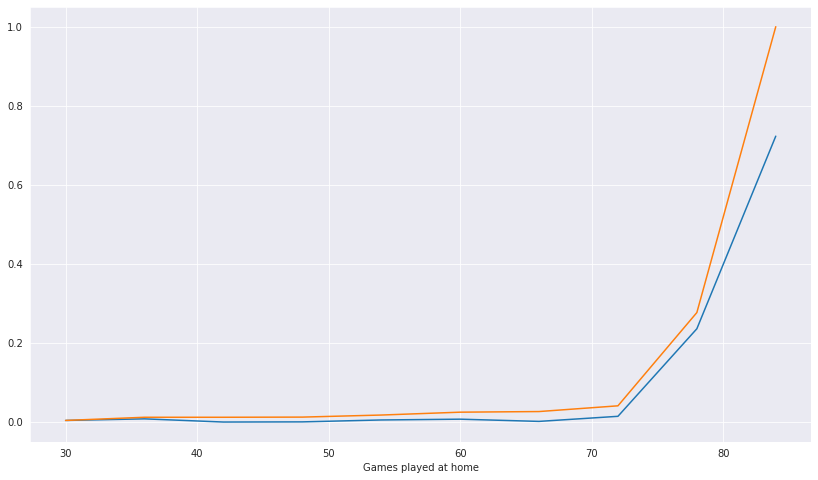

In [ ]:
#pdf and cdf
counts,bin_edges=np.histogram(df['Ghome'],bins=10,density=True)
plt.xlabel("Games played at home")
pdf=counts/sum(counts)
print("probability density function(pdf",pdf)
print("bin_edges",bin_edges)
cdf=np.cumsum(pdf)
print("cumulative distributive function(cdf)",cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

In [ ]:
df.head()

,yearID,lgID,teamID,franchID,Rank,Ghome,LgWin,WSWin,name,park,attendance,BPF,PPF
0,1890,NL,BRO,LAD,1.0,78.014476,Y,N,Brooklyn Bridegrooms,Washington Park II,121412.0,101,97
1,1890,NL,BSN,ATL,5.0,78.014476,N,N,Boston Beaneaters,South End Grounds II,147539.0,108,105
2,1890,NL,CHN,CHC,2.0,78.014476,N,N,Chicago Colts,West Side Park I,102536.0,104,102
3,1890,NL,CIN,CIN,4.0,78.014476,N,N,Cincinnati Reds,League Park I in Cincinnati,131980.0,101,101
4,1890,NL,CL4,CLV,7.0,78.014476,N,N,Cleveland Spiders,National League Park,47478.0,94,97


probability density function(pdf [0.00321543 0.07717042 0.08360129 0.08360129 0.08360129 0.09405145
 0.12700965 0.13665595 0.14228296 0.16881029]
bin_edges [1890. 1903. 1916. 1929. 1942. 1955. 1968. 1981. 1994. 2007. 2020.]
cumulative distributive function(cdf) [0.00321543 0.08038585 0.16398714 0.24758842 0.33118971 0.42524116
 0.5522508  0.68890675 0.83118971 1.        ]


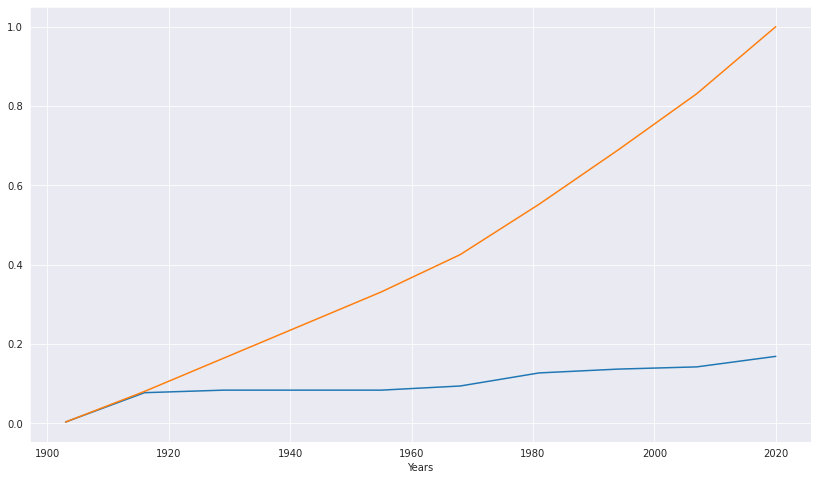

In [ ]:
#pdf and cdf
counts,bin_edges=np.histogram(df['yearID'],bins=10,density=True)
plt.xlabel("Years")
pdf=counts/sum(counts)
print("probability density function(pdf",pdf)
print("bin_edges",bin_edges)
cdf=np.cumsum(pdf)
print("cumulative distributive function(cdf)",cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

probability density function(pdf [0.15916399 0.19614148 0.15996785 0.13062701 0.12098071 0.09726688
 0.06913183 0.04622186 0.0164791  0.00401929]
bin_edges [      0.     438399.225  876798.45  1315197.675 1753596.9   2191996.125
 2630395.35  3068794.575 3507193.8   3945593.025 4383992.25 ]
cumulative distributive function(cdf) [0.15916399 0.35530547 0.51527331 0.64590032 0.76688103 0.86414791
 0.93327974 0.97950161 0.99598071 1.        ]


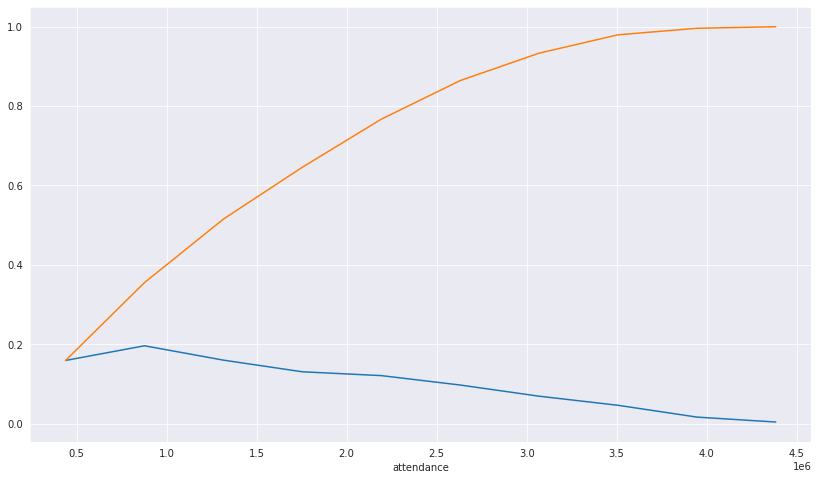

In [ ]:
#pdf and cdf
counts,bin_edges=np.histogram(df['attendance'],bins=10,density=True)
plt.xlabel("attendance")
pdf=counts/sum(counts)
print("probability density function(pdf",pdf)
print("bin_edges",bin_edges)
cdf=np.cumsum(pdf)
print("cumulative distributive function(cdf)",cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

probability density function(pdf [0.03255627 0.1676045  0.35209003 0.30184887 0.11093248 0.0233119
 0.00562701 0.00321543 0.00160772 0.00120579]
bin_edges [ 88.   92.1  96.2 100.3 104.4 108.5 112.6 116.7 120.8 124.9 129. ]
cumulative distributive function(cdf) [0.03255627 0.20016077 0.5522508  0.85409968 0.96503215 0.98834405
 0.99397106 0.9971865  0.99879421 1.        ]


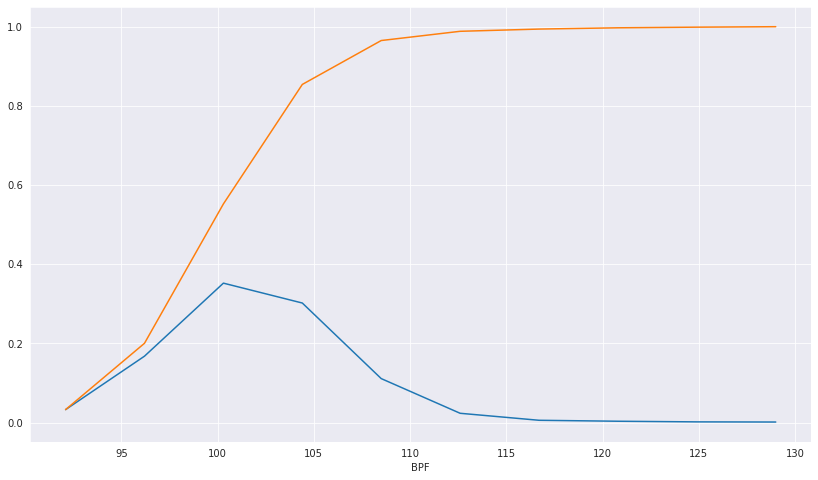

In [ ]:
#pdf and cdf
counts,bin_edges=np.histogram(df['BPF'],bins=10,density=True)
plt.xlabel("BPF")
pdf=counts/sum(counts)
print("probability density function(pdf",pdf)
print("bin_edges",bin_edges)
cdf=np.cumsum(pdf)
print("cumulative distributive function(cdf)",cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

probability density function(pdf [0.0357717  0.15876206 0.35731511 0.2994373  0.10811897 0.0261254
 0.00884244 0.00241158 0.00200965 0.00120579]
bin_edges [ 88.   92.1  96.2 100.3 104.4 108.5 112.6 116.7 120.8 124.9 129. ]
cumulative distributive function(cdf) [0.0357717  0.19453376 0.55184887 0.85128617 0.95940514 0.98553055
 0.99437299 0.99678457 0.99879421 1.        ]


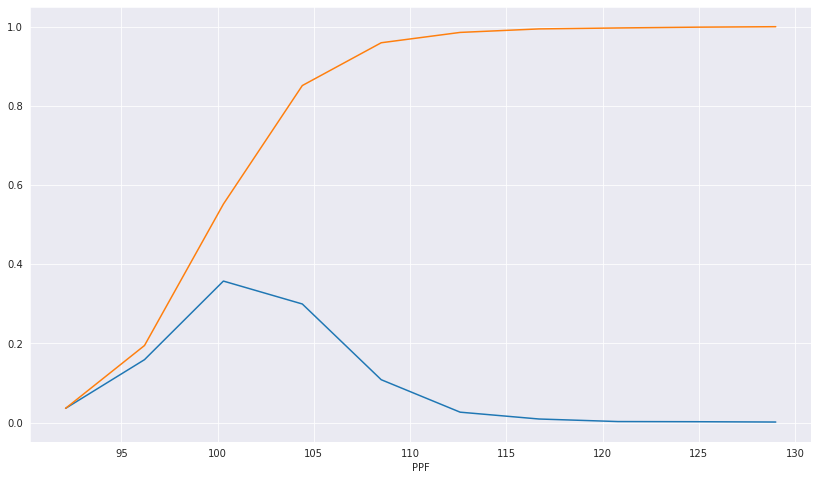

In [ ]:
#pdf and cdf
counts,bin_edges=np.histogram(df['PPF'],bins=10,density=True)
plt.xlabel("PPF")
pdf=counts/sum(counts)
print("probability density function(pdf",pdf)
print("bin_edges",bin_edges)
cdf=np.cumsum(pdf)
print("cumulative distributive function(cdf)",cdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

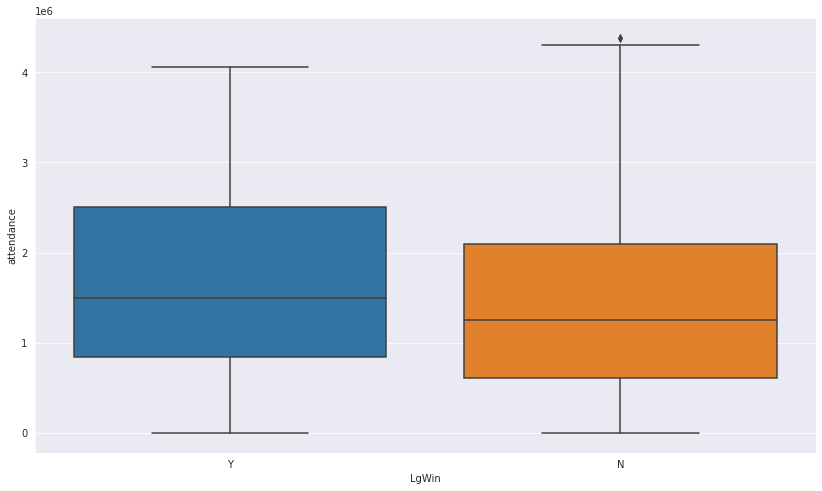

In [ ]:
#boxplot
sns.boxplot(x='LgWin',y='attendance',data=df)
plt.show()

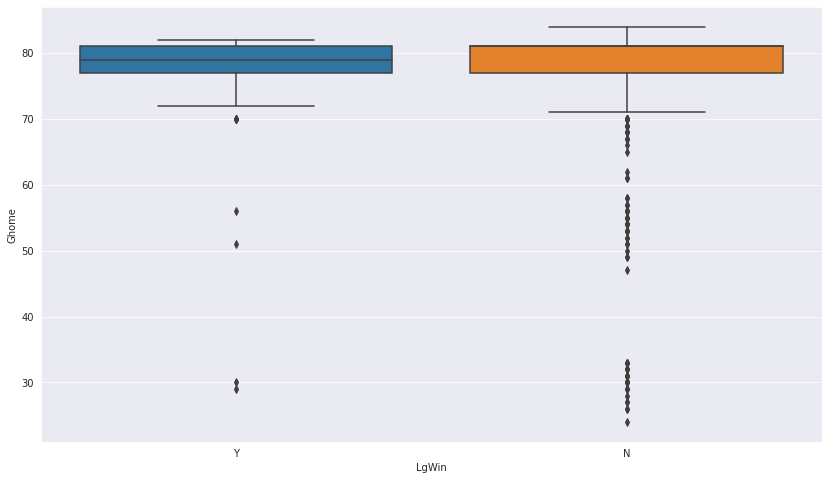

In [ ]:
#boxplot
sns.boxplot(x='LgWin',y='Ghome',data=df)
plt.show()

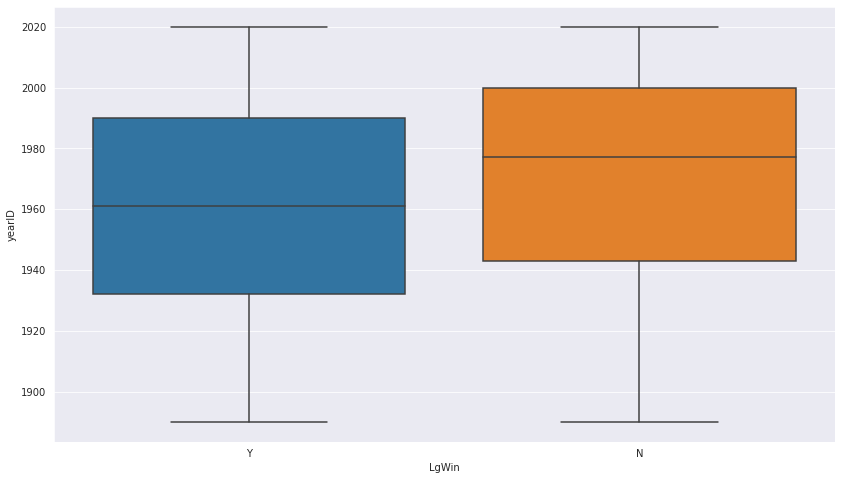

In [ ]:
#boxplot
sns.boxplot(x='LgWin',y='yearID',data=df)
plt.show()

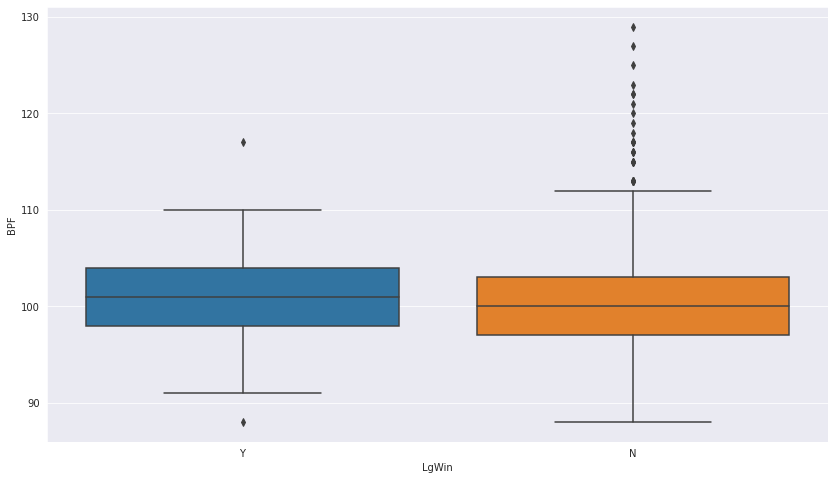

In [ ]:
#boxplot
sns.boxplot(x='LgWin',y='BPF',data=df)
plt.show()

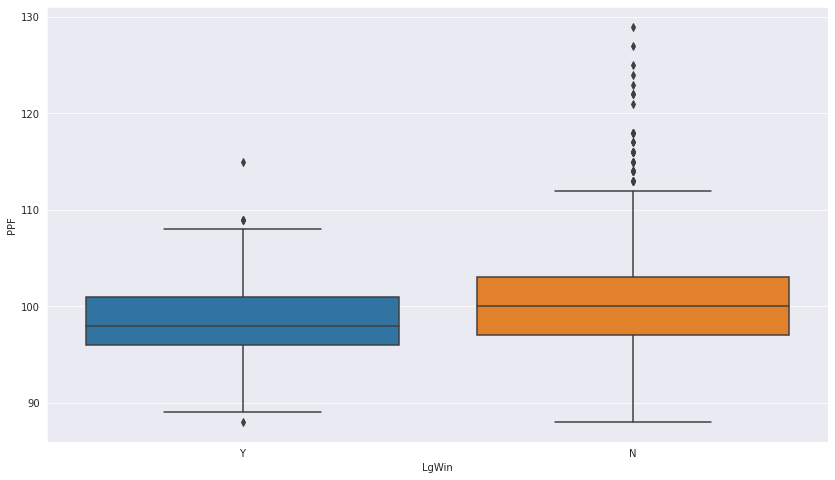

In [ ]:
#boxplot
sns.boxplot(x='LgWin',y='PPF',data=df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


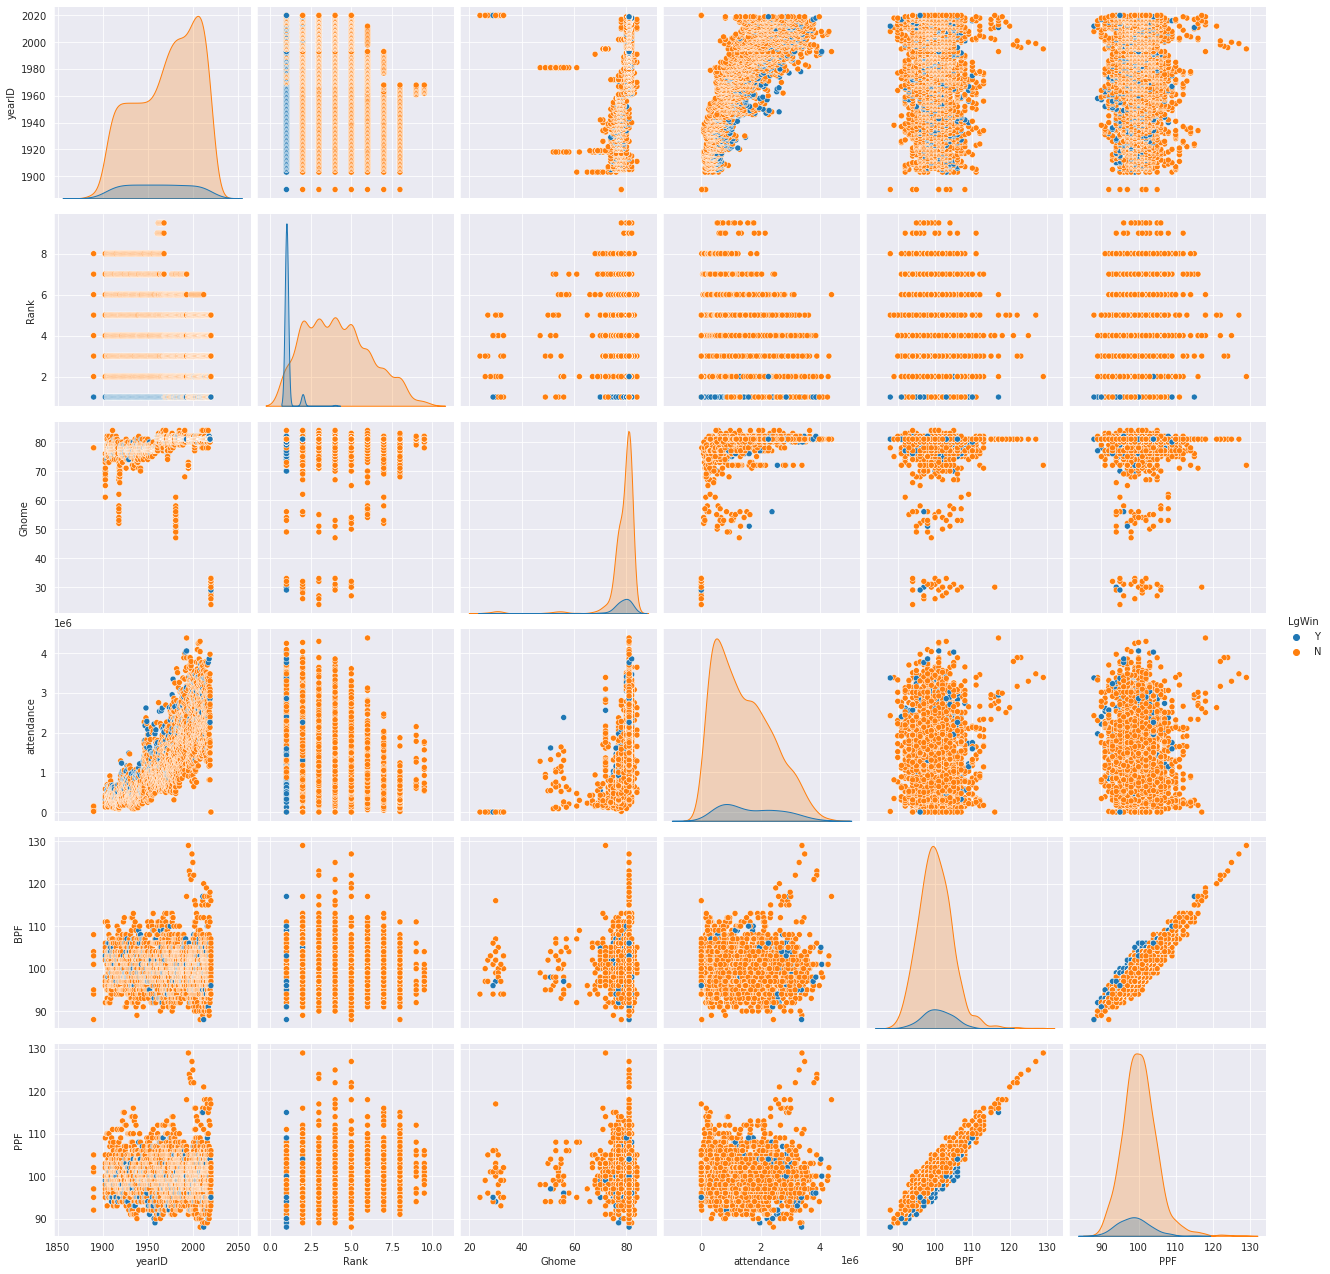

In [ ]:
#pairplot
sns.pairplot(df,hue='LgWin',size=3)
plt.show()

In [ ]:
df[:2]

,yearID,lgID,teamID,franchID,Rank,Ghome,LgWin,WSWin,name,park,attendance,BPF,PPF
0,1890,NL,BRO,LAD,1.0,78.014476,Y,N,Brooklyn Bridegrooms,Washington Park II,121412.0,101,97
1,1890,NL,BSN,ATL,5.0,78.014476,N,N,Boston Beaneaters,South End Grounds II,147539.0,108,105


In [ ]:
'''from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
data_with_imputed_values = my_imputer.fit_transform(original_data)'''